<a href="https://colab.research.google.com/github/24daejin/test/blob/master/world_bank_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 세계은행 데이터베이스 기초

세계은행데이터베이스 활용 API 패키지 설치

In [ ]:
!pip install wbgapi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


세계 은행 데이터 활용하기 위한 패키지(wbgapi)와
데이터를 처리할 판다스와 넘파이 import

데이터 시각화를 위한 plotly 패키지 import

In [ ]:
import pandas as pd
import wbgapi as wb
import numpy as np

import plotly.express as px
import plotly.graph_objects as go

데이터 시리즈 

In [ ]:
wb.source.info()

id,name,code,concepts,lastupdated
1,Doing Business,DBS,3,2021-08-18
2,World Development Indicators,WDI,3,2022-07-20
3,Worldwide Governance Indicators,WGI,3,2021-09-27
5,Subnational Malnutrition Database,SNM,3,2016-03-21
6,International Debt Statistics,IDS,4,2022-01-14
11,Africa Development Indicators,ADI,3,2013-02-22
12,Education Statistics,EDS,3,2020-12-20
13,Enterprise Surveys,ESY,3,2022-03-25
14,Gender Statistics,GDS,3,2022-06-23
15,Global Economic Monitor,GEM,3,2020-07-27


얻은 소스의 id와 name을 csv로 저장 후 로드(따로 데이터베이스로 옮기는 method 없음.
source에서는 name의 series로만 저장됨.
저장된 csv 파일을 로드하여 data_list에 id를 저장


In [ ]:
series = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/series.csv')
data_list = list(series['id'])
series.head()

,id,name,code,concept,lastupdated
0,1,Doing Business,DBS,3.0,2021-08-18
1,2,World Development Indicators,WDI,3.0,2022-07-20
2,3,Worldwide Governance Indicators,WGI,3.0,2021-09-27
3,5,Subnational Malnutrition Database,SNM,3.0,2016-03-21
4,6,International Debt Statistics,IDS,4.0,2022-01-14


# 메타 데이터

## 수집, 저장, 번역

각 source의 id를 통해 메타데이터 수집
메타 데이터를 딕셔너리로 수집하여 데이터프레임으로 만든 후 번역

In [ ]:
metadata = {'Series':None,'Aggregationmethod':None,'BasePeriod':None,'Generalcomments':None,
            'Developmentrelevance':None, 'IndicatorName':None, 'License_Type':None,
            'License_URL':None, 'Longdefinition':None,'Shortdefinition':None,
            'Relatedsourcelinks':None, 'Limitationsandexceptions':None,'Periodicity':None,
             'Source':None,'Statisticalconceptandmethodology':None,'Topic':None,
            'Unitofmeasure':None}

meta_list = ['Series','Aggregationmethod','BasePeriod','Generalcomments',
            'Developmentrelevance', 'IndicatorName', 'License_Type',
            'License_URL', 'Longdefinition','Shortdefinition',
            'Relatedsourcelinks', 'Limitationsandexceptions','Periodicity',
             'Source','Statisticalconceptandmethodology','Topic','Unitofmeasure']
# 메타데이터를 저장할 데이터 프레임 생성
meta_df = pd.DataFrame()


In [ ]:
wb.series.info()

id,value
AG.AGR.TRAC.NO,"Agricultural machinery, tractors"
AG.CON.FERT.PT.ZS,Fertilizer consumption (% of fertilizer production)
AG.CON.FERT.ZS,Fertilizer consumption (kilograms per hectare of arable land)
AG.LND.AGRI.K2,Agricultural land (sq. km)
AG.LND.AGRI.ZS,Agricultural land (% of land area)
AG.LND.ARBL.HA,Arable land (hectares)
AG.LND.ARBL.HA.PC,Arable land (hectares per person)
AG.LND.ARBL.ZS,Arable land (% of land area)
AG.LND.CREL.HA,Land under cereal production (hectares)
AG.LND.CROP.ZS,Permanent cropland (% of land area)


DT.DOD.MIDA.CD -> json 오류

In [ ]:
import time

df_data = pd.DataFrame(wb.series.Series()).reset_index()
series_list = list(df_data['index'].unique())

for b in list(series_list):
  if b ==('DT.DOD.MIDA.CD' or 'HD.HCI.OVRL.FE'):
    pass
  else:
    meta = wb.series.metadata.get(b)
    meta = str(meta)
    meta = meta.splitlines()

    result = []
    for values in meta:
        if values not in result:
            result.append(values)
    meta_tmp = []
    for i, j in enumerate(result):
        if j == ("========" or '' or '--------'):
            continue
        else:
            meta_tmp.append(j)

    for i, j in enumerate(meta_tmp):
        data_tmp = []
        if j == ("========" or '' or '--------'):
            continue
        elif result[i].split(': ')[0] in meta_list:
            metadata['{}'.format(result[i].split(': ')[0])] = result[i].replace('{} :'.format(result[i].split(': ')[0]),'')
        else:
            data_tmp.append(metadata['{}'.format(result[i - 1].split(': ')[0])])
            data_tmp.append(j)
            metadata['{}'.format(result[i].split(': ')[0])] = data_tmp
    meta_df_tmp = pd.DataFrame(metadata)
    meta_df = pd.concat([meta_df, meta_df_tmp])
    time.sleep(1)
    print(b)

AG.AGR.TRAC.NO
AG.CON.FERT.PT.ZS
AG.CON.FERT.ZS
AG.LND.AGRI.K2
AG.LND.AGRI.ZS
AG.LND.ARBL.HA
AG.LND.ARBL.HA.PC
AG.LND.ARBL.ZS
AG.LND.CREL.HA
AG.LND.CROP.ZS
AG.LND.EL5M.RU.K2
AG.LND.EL5M.RU.ZS
AG.LND.EL5M.UR.K2
AG.LND.EL5M.UR.ZS
AG.LND.EL5M.ZS
AG.LND.FRST.K2
AG.LND.FRST.ZS
AG.LND.IRIG.AG.ZS
AG.LND.PRCP.MM
AG.LND.TOTL.K2
AG.LND.TOTL.RU.K2
AG.LND.TOTL.UR.K2
AG.LND.TRAC.ZS
AG.PRD.CREL.MT
AG.PRD.CROP.XD
AG.PRD.FOOD.XD
AG.PRD.LVSK.XD
AG.SRF.TOTL.K2
AG.YLD.CREL.KG
BG.GSR.NFSV.GD.ZS
BM.GSR.CMCP.ZS
BM.GSR.FCTY.CD
BM.GSR.GNFS.CD
BM.GSR.INSF.ZS
BM.GSR.MRCH.CD
BM.GSR.NFSV.CD
BM.GSR.ROYL.CD
BM.GSR.TOTL.CD
BM.GSR.TRAN.ZS
BM.GSR.TRVL.ZS
BM.KLT.DINV.CD.WD
BM.KLT.DINV.WD.GD.ZS
BM.TRF.PRVT.CD
BM.TRF.PWKR.CD.DT
BN.CAB.XOKA.CD
BN.CAB.XOKA.GD.ZS
BN.FIN.TOTL.CD
BN.GSR.FCTY.CD
BN.GSR.GNFS.CD
BN.GSR.MRCH.CD
BN.KAC.EOMS.CD
BN.KLT.DINV.CD
BN.KLT.PTXL.CD
BN.RES.INCL.CD
BN.TRF.CURR.CD
BN.TRF.KOGT.CD
BX.GRT.EXTA.CD.WD
BX.GRT.TECH.CD.WD
BX.GSR.CCIS.CD
BX.GSR.CCIS.ZS
BX.GSR.CMCP.ZS
BX.GSR.FCTY.CD
BX.GSR.GNFS.CD
BX.G

메타데이터 저장

In [ ]:
meta_df.drop_duplicates('Series')
meta_df = meta_df[meta_list]
meta_df = meta_df.drop_duplicates('Series')

meta_df.to_excel('/content/drive/MyDrive/Colab Notebooks/series.csvmetadata.xlsx')

저장된 파일을 번역하여 다시 파일을 로드

In [ ]:
meta_t = pd.read_excel('/Users/idaejin/Downloads/metadata_1.xlsx', index_col=False)

# CO2 데이터

## World Data Bank의 CO2 데이터


데이터 프레임 생성

Series Name : EN.ATM.GHGT.KT.CE

mrv : most recent value(최신값으로부터 몇 년치 데이터 수집)

columns = 'series' -> 컬럼이 시리즈 명으로 작성되어 세로로 긴 데이터 프레임이 생성

numericTimeKets = True : 연도가 YR2020 스타일이 아닌 2020으로 출력
reset_index() : index default는 economy 컬럼, 데이터는 ISO3로 되어 있으므로 인덱스를 다시 만듬

In [ ]:
CO2_df = wb.data.DataFrame('EN.ATM.GHGT.KT.CE', mrv=20, skipBlanks=True, columns='series', labels = True, numericTimeKeys=True).reset_index()

economy 메소드를 통해 나라별 이름과 ISO3 명 등을 로드

In [ ]:
regionalIndentifiers = wb.economy.DataFrame(skipAggs=True).reset_index()
regionalIndentifiers

,id,name,aggregate,longitude,latitude,region,adminregion,lendingType,incomeLevel,capitalCity
0,ABW,Aruba,False,-70.0167,12.51670,LCN,,LNX,HIC,Oranjestad
1,AFG,Afghanistan,False,69.1761,34.52280,SAS,SAS,IDX,LIC,Kabul
2,AGO,Angola,False,13.2420,-8.81155,SSF,SSA,IBD,LMC,Luanda
3,ALB,Albania,False,19.8172,41.33170,ECS,ECA,IBD,UMC,Tirane
4,AND,Andorra,False,1.5218,42.50750,ECS,,LNX,HIC,Andorra la Vella
...,...,...,...,...,...,...,...,...,...,...
212,XKX,Kosovo,False,20.9260,42.56500,ECS,ECA,IDX,UMC,Pristina
213,YEM,"Yemen, Rep.",False,44.2075,15.35200,MEA,MNA,IDX,LIC,Sana'a
214,ZAF,South Africa,False,28.1871,-25.74600,SSF,SSA,IBD,UMC,Pretoria
215,ZMB,Zambia,False,28.2937,-15.39820,SSF,SSA,IDX,LIC,Lusaka


CO2 데이터와 economy에서 제공하는 데이터 병합

In [ ]:
CO2_df_region = pd.merge(CO2_df, regionalIndentifiers, how = 'left', left_on= 'economy', right_on = 'id')
CO2_df_region= CO2_df_region.dropna()

### 시각화

#### Bar Chart

In [ ]:
fig = px.bar(CO2_df_region, x="time", y="EN.ATM.GHGT.KT.CE", 
             color="incomeLevel", hover_name = "Country",title="CO2_Emission") 
fig.show()

#### 상위 10개 이산화탄소 배출국의 Bar Chart

2019년 기준 CO2배출


In [ ]:
CO2_2019 = wb.data.DataFrame('EN.ATM.GHGT.KT.CE', time=range(2019, 2020), skipBlanks=True, columns='series', labels = True, numericTimeKeys=True).reset_index()
CO2_2019

,economy,Country,EN.ATM.GHGT.KT.CE
0,ZWE,Zimbabwe,3.053000e+04
1,ZMB,Zambia,3.757000e+04
2,YEM,"Yemen, Rep.",2.526000e+04
3,VNM,Vietnam,4.501500e+05
4,VEN,"Venezuela, RB",2.557400e+05
...,...,...,...
234,CEB,Central Europe and the Baltics,8.031200e+05
235,CSS,Caribbean small states,6.236000e+04
236,ARB,Arab World,2.881820e+06
237,AFW,Africa Western and Central,8.338400e+05


상위 10개 데이터 추출

나라 이름 추출

In [ ]:
df = wb.economy.DataFrame(skipAggs=False)
df = df.reset_index()
df = df[df['aggregate']==False]
df = df['id']

나라의 데이터 추출(지역 제외, eg. world)

In [ ]:
CO2_2019 = pd.merge(CO2_2019, df, how = 'right', left_on = 'economy', right_on = 'id').dropna()
CO2_2019

,economy,Country,EN.ATM.GHGT.KT.CE,id_x,id_y
1,AFG,Afghanistan,28639.999390,AFG,AFG
2,AGO,Angola,79680.000305,AGO,AGO
3,ALB,Albania,9010.000229,ALB,ALB
4,AND,Andorra,629.999995,AND,AND
5,ARE,United Arab Emirates,243550.003052,ARE,ARE
...,...,...,...,...,...
211,WSM,Samoa,680.000007,WSM,WSM
213,YEM,"Yemen, Rep.",25260.000229,YEM,YEM
214,ZAF,South Africa,555429.992676,ZAF,ZAF
215,ZMB,Zambia,37569.999695,ZMB,ZMB


nlargest = 10

In [ ]:
CO2_list = CO2_2019.nlargest(10, ['EN.ATM.GHGT.KT.CE'], keep='first')
top_10 = list(CO2_list['economy'])

In [ ]:
CO2_df_region['top'] = CO2_df_region['economy'].apply(lambda x : 'top' if x in top_10 else "else")
CO2_df_region

,economy,time,Country,Time,EN.ATM.GHGT.KT.CE,id,name,aggregate,longitude,latitude,region,adminregion,lendingType,incomeLevel,capitalCity,top
0,ZWE,2019,Zimbabwe,2019,30530.000687,ZWE,Zimbabwe,False,31.0672,-17.8312,SSF,SSA,IDB,LMC,Harare,else
1,ZWE,2018,Zimbabwe,2018,30829.999924,ZWE,Zimbabwe,False,31.0672,-17.8312,SSF,SSA,IDB,LMC,Harare,else
2,ZWE,2017,Zimbabwe,2017,28299.999237,ZWE,Zimbabwe,False,31.0672,-17.8312,SSF,SSA,IDB,LMC,Harare,else
3,ZWE,2016,Zimbabwe,2016,28530.000687,ZWE,Zimbabwe,False,31.0672,-17.8312,SSF,SSA,IDB,LMC,Harare,else
4,ZWE,2015,Zimbabwe,2015,30700.000763,ZWE,Zimbabwe,False,31.0672,-17.8312,SSF,SSA,IDB,LMC,Harare,else
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3815,AFG,2004,Afghanistan,2004,15310.000420,AFG,Afghanistan,False,69.1761,34.5228,SAS,SAS,IDX,LIC,Kabul,else
3816,AFG,2003,Afghanistan,2003,15529.999733,AFG,Afghanistan,False,69.1761,34.5228,SAS,SAS,IDX,LIC,Kabul,else
3817,AFG,2002,Afghanistan,2002,14890.000343,AFG,Afghanistan,False,69.1761,34.5228,SAS,SAS,IDX,LIC,Kabul,else
3818,AFG,2001,Afghanistan,2001,12250.000000,AFG,Afghanistan,False,69.1761,34.5228,SAS,SAS,IDX,LIC,Kabul,else


시각화

In [ ]:
fig = px.bar(CO2_df_region[CO2_df_region['top']=='top'], x="time", y="EN.ATM.GHGT.KT.CE",
             color="incomeLevel", hover_name = "Country", title="CO2_Emission") 
fig.show()

# SDGs 7 - 데이터 분석

SDGs 데이터 소스 데이터 베이스 id : 46

In [ ]:
wb.series.Series(db=46)
wb.series.info(db=46)

id,value
AG.LND.FRST.K2,Forest area (sq. km)
AG.LND.FRST.ZS,Forest area (% of land area)
AG.YLD.CREL.KG,Cereal yield (kg per hectare)
BN.CAB.XOKA.GD.ZS,Current account balance (% of GDP)
BN.KLT.PTXL.CD,"Portfolio investment, net (BoP, current US$)"
BX.KLT.DINV.CD.WD,"Foreign direct investment, net inflows (BoP, current US$)"
BX.KLT.DINV.WD.GD.ZS,"Foreign direct investment, net inflows (% of GDP)"
BX.TRF.PWKR.DT.GD.ZS,"Personal remittances, received (% of GDP)"
DT.DOD.DECT.GN.ZS,External debt stocks (% of GNI)
DT.ODA.ALLD.CD,Net official development assistance and official aid received (current US$)


7.1.1

7.1.2

7.2.1

데이터 활용

In [ ]:
# df_7 = wb.data.DataFrame('EG.ACS.ELEC.ZS','EG.ACS.ELEC.RU.ZS','EG.ACS.ELEC.UR.ZS',
#                          'EG.CFT.ACCS.ZS', 'EG.FEC.RNEW.ZS'], mrv=20, skipBlanks=True,
#                            columns='series', labels = True, numericTimeKeys=True).reset_index()
import time

df_711 = wb.data.DataFrame('EG.ELC.ACCS.ZS', mrv=1, skipBlanks=True, columns='series', labels = True, numericTimeKeys=True).reset_index()
time.sleep(3)
df_711_UR = wb.data.DataFrame('EG.ELC.ACCS.UR.ZS', mrv=1, skipBlanks=True, columns='series', labels = True, numericTimeKeys=True).reset_index()
time.sleep(3)
df_711_RU = wb.data.DataFrame('EG.ELC.ACCS.RU.ZS', mrv=1, skipBlanks=True, columns='series', labels = True, numericTimeKeys=True).reset_index()
time.sleep(3)
df_721 = wb.data.DataFrame('EG.FEC.RNEW.ZS', mrv=1, skipBlanks=True, columns='series', labels = True, numericTimeKeys=True).reset_index()
time.sleep(3)
df_712 = wb.data.DataFrame('EG.CFT.ACCS.ZS', mrv=1, skipBlanks=True, columns='series', labels = True, numericTimeKeys=True).reset_index()


데이터 프레임 합치기 & 컬럼 이름 변경

In [ ]:
df_7 = pd.merge(df_711, df_711_RU, on = ['economy','Country'])
df_7 = pd.merge(df_7, df_711_UR, on = ['economy','Country'])
df_7 = pd.merge(df_7, df_721, on = ['economy','Country'])
df_7 = pd.merge(df_7, df_712, on = ['economy','Country'])
df_7 = df_7.rename(columns = {'EG.ELC.ACCS.ZS':'711', 'EG.ELC.ACCS.UR.ZS':'711_U', 'EG.ELC.ACCS.RU.ZS':'711_R'})

711에서 (URBAN - RURAL)/ALL 을 계산한 열 추가 후 100 곱함

In [ ]:
def gap_cal(x):
    return (x['711_U']-x['711_R'])/x['711']

df_7['EG_gap'] = df_7.apply(gap_cal, axis=1)

In [ ]:
df_7['EG_gap'] = df_7['EG_gap']*100

## 데이터 처리(Non PCA, Mean shift)

라이브러리 추가

In [ ]:
from sklearn.cluster import MeanShift, estimate_bandwidth
from matplotlib import pyplot as plt

Mean Shift

3가지의 Series에서 데이터를 얻었기 때문에 3가지의 데이터 활용

In [ ]:
results = df_7[['EG_gap', 'EG.FEC.RNEW.ZS', 'EG.CFT.ACCS.ZS']].values

bandwidth 에서 quantile을 0.2로 설정

In [ ]:
bandwidth = estimate_bandwidth(results, quantile=0.2)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(results)

MeanShift(bandwidth=43.050090405345045, bin_seeding=True)

In [ ]:
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
best_cluster = n_clusters_
print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 7


분류된 클러스터 레이블을 데이터프레임에 추가

In [ ]:
df_7['ClusterLabel'] = labels

#### 시각화

##### 산점도

IndexError: ignored

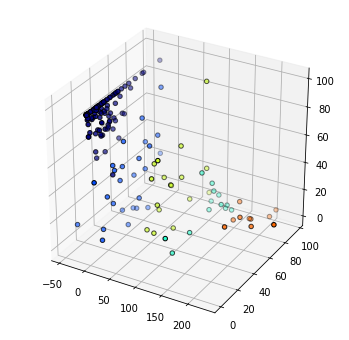

In [ ]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
# from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

n_cluster = 5
c_colors = []
for i in range(n_cluster):
    c_color = cm.jet(float(i) / n_cluster)
    c_colors.append(c_color)
    y_labels = df_7['ClusterLabel']
    col = list(df_7.columns)
    xs = df_7[df_7['ClusterLabel'] == i][col[7]]
    ys = df_7[df_7['ClusterLabel'] == i][col[5]]
    zs = df_7[df_7['ClusterLabel'] == i][col[6]]
    ax.scatter(xs, ys, zs,
               marker='o', color=c_color, edgecolors='black',
               label='cluster ' + str(i))

for i in range(n_cluster):
    ax.scatter(cluster_centers[i, 0], cluster_centers[i, 1], cluster_centers[i, 2],
               marker='^', color=c_colors[i], edgecolors='w', s=200)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

##### Choropleth

In [ ]:
from plotly import graph_objects as go

fig = go.Figure(data=go.Choropleth(
        text = df_7['Country'],
        locations=df_7['economy'],  # Assign location data
        z=df_7['ClusterLabel'],
        zauto = True,
        colorscale = 'viridis',
        showscale = True
    )
)

#Update layout
fig.update_layout(
    mapbox_style = "carto-positron", #Decide a style for the map
    mapbox_zoom = 2, #Zoom in scale
)
fig.show()

## 데이터 처리(PCA, Mean shift)

라이브러리 로드

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

MinMaxSclaer

In [ ]:
scaler = MinMaxScaler()

데이터 로드

In [ ]:
data = df_7[['EG_gap', 'EG.FEC.RNEW.ZS', 'EG.CFT.ACCS.ZS']]

In [ ]:
data_scale = pd.DataFrame(scaler.fit_transform(data), columns=data.columns, index = data.index)

PCA - MinMaxScaler 사용

In [ ]:
pca = PCA(random_state=1107)
X_p = pca.fit_transform(data_scale)
# X_p = pca.fit_transform(data)

PCA로 데이터 변수 축소(0.95이상의 설명력이 있는 변수까지 선택)

In [ ]:
pd.Series(np.cumsum(pca.explained_variance_ratio_))

0    0.843495
1    0.969259
2    1.000000
dtype: float64

In [ ]:
percent_variance = np.round(pca.explained_variance_ratio_ * 100, decimals=2)

In [ ]:
columns = []
for i in range(len(percent_variance)):
    columns.append(f'PC{i + 1}')

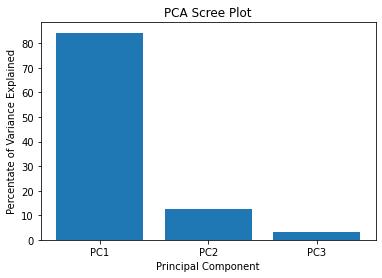

In [ ]:
ax = plt.bar(x=range(len(percent_variance)), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

In [ ]:
X_pp = pd.DataFrame(X_p[:,:2], columns = ['PC1','PC2'], index = data.index)
X_pp

,PC1,PC2
0,0.608804,0.216503
1,0.809701,0.132533
2,-0.113175,-0.272662
3,-0.069443,-0.123326
4,-0.342216,0.033950
...,...,...
177,-0.451418,-0.073283
178,-0.350300,0.074800
179,-0.453227,-0.081335
180,-0.073687,0.151463


Mean shift

패키지 로드

In [ ]:
from sklearn.cluster import MeanShift, estimate_bandwidth
from matplotlib import pyplot as plt

최적 PCA 변수 개수 입력

In [ ]:
pca_num_components = 2

In [ ]:
reduced_data = PCA(n_components=pca_num_components).fit_transform(data)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

In [ ]:
bandwidth = estimate_bandwidth(results, quantile=0.2)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)

ms.fit(results)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

best_cluster = n_clusters_
df_7['ClusterLabel'] = labels


number of estimated clusters : 6


In [ ]:
cluster_centers

array([[-42.53468708,  12.80896259],
       [ 91.17341267, -29.33725495],
       [ 28.2856154 , -29.35762691],
       [137.53722686, -16.06132504],
       [302.43722969,  70.97724459],
       [465.12347757, 146.96103974]])

### 시각화

#### 산점도

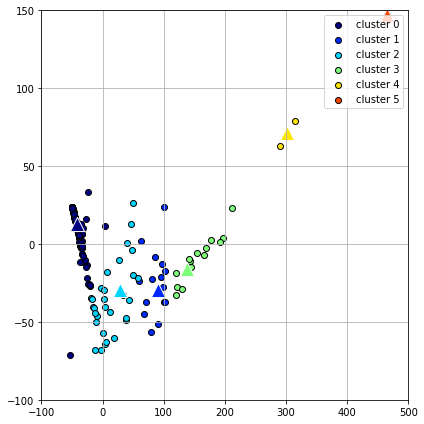

In [ ]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
from matplotlib import cm
n_cluster=6
c_colors = []
for i in range(n_cluster):
    c_color = cm.jet(float(i)/n_cluster)
    c_colors.append(c_color)
    y_labels = df_7['ClusterLabel']
    col = list(results.columns)
    col
    x = results[df_7['ClusterLabel'] == i][col[0]]
    y = results[df_7['ClusterLabel'] == i][col[1]]
    ax.scatter(x, y,
               marker='o', color=c_color, edgecolors='black',
               label='cluster ' + str(i))

for i in range(n_cluster):
    ax.scatter(cluster_centers[i,0], cluster_centers[i,1],
               marker='^', color = c_colors[i], edgecolors='w', s=200)
plt.legend()
plt.xlim([-100, 500])      # X축의 범위: [xmin, xmax]
plt.ylim([-100, 150])     # Y축의 범위: [ymin, ymax]
plt.grid()
plt.tight_layout()
plt.show()

#### Choropleth

In [ ]:
from plotly import graph_objects as go

fig = go.Figure(data=go.Choropleth(
        text = df_7['Country'],
        locations=df_7['economy'],  # Assign location data
        z=df_7['ClusterLabel'],
        zauto = True,
        colorscale = 'viridis',
        showscale = True
    )
)

#Update layout
fig.update_layout(
    mapbox_style = "carto-positron", #Decide a style for the map
    mapbox_zoom = 2, #Zoom in scale
)
fig.show()
# fig.write_html('first_figure.html', auto_open=True)

## 데이터처리(IncrementalPCA, Mean shift)

라이브러리 로드

In [ ]:
from sklearn.decomposition import IncrementalPCA

IncrementalPCA 이용하여 데이터 변환

In [ ]:
reduced_data = IncrementalPCA(n_components=pca_num_components).fit_transform(data)

In [ ]:
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

Meanshift

In [ ]:
bandwidth = estimate_bandwidth(results, quantile=0.2)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)

ms.fit(results)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

best_cluster = n_clusters_
df_7['ClusterLabel'] = labels

number of estimated clusters : 7


number of estimated clusters : 7

### 시각화

#### 산점도

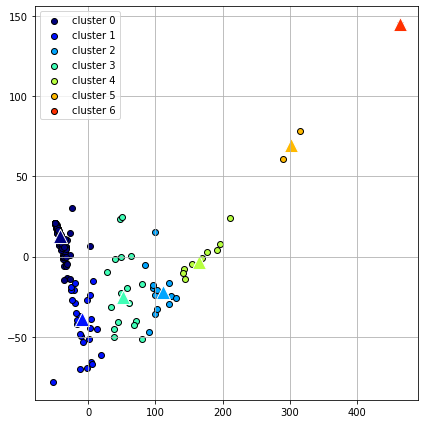

In [ ]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
                     # , projection='3d')
from matplotlib import cm
n_cluster=7
c_colors = []
for i in range(n_cluster):
    c_color = cm.jet(float(i)/n_cluster)
    c_colors.append(c_color)
    y_labels = df_7['ClusterLabel']
    col = list(results.columns)
    col
    x = results[df_7['ClusterLabel'] == i][col[0]]
    y = results[df_7['ClusterLabel'] == i][col[1]]
    # zs = df_7[df_7['ClusterLabel'] == i][col[6]]
    ax.scatter(x, y,
               marker='o', color=c_color, edgecolors='black',
               label='cluster ' + str(i))

for i in range(n_cluster):
    ax.scatter(cluster_centers[i,0], cluster_centers[i,1],
               marker='^', color = c_colors[i], edgecolors='w', s=200)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

#### Choropleth

In [ ]:

from plotly import graph_objects as go

fig = go.Figure(data=go.Choropleth(
        text = df_7['Country'],
        locations=df_7['economy'],  # Assign location data
        z=df_7['ClusterLabel'],
        zauto = True,
        colorscale = 'viridis',
        showscale = True
    )
)

#Update layout
fig.update_layout(
    mapbox_style = "carto-positron", #Decide a style for the map
    mapbox_zoom = 2, #Zoom in scale
)
fig.show()